In [21]:
#Bhumi Patel(B00824756)
#Jay Sharma(B00824331)

import pandas as pd 
import numpy as np
file_name = "zomato.csv"
df = pd.read_csv(file_name)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [22]:
#remove duplicate value and make new file without duplicate 
file_name_output = "zomato_without_dupli.csv"
df=df.drop_duplicates(subset='address', keep="first")
df.to_csv(file_name_output)
print(len(df))

11495


In [23]:

#drop row which contain garbage data
df=df[df.votes.apply(lambda X :isinstance(X, int))]

#Clean the data of 'rate' 
df['rate'] = df['rate'].str.replace('/5','')
df['rate'] = df['rate'].str.replace('NEW','0')
df['rate'] = df['rate'].str.replace('-','0')
df_rate=df[['rate']].dropna()
df_rate=np.array(df_rate,dtype=np.float)

#clean the data of 'cost' column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype('str')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

#Remove NA/NAN values 
df= df.fillna(0)

#clean data of location which contain '0' value in some rows
df=df[df.location.apply(lambda X :X!=0)]
df=df[df.rest_type.apply(lambda X :X!=0)]
df=df[df.cuisines.apply(lambda X :X!=0)]
df.location=df['location'].str.replace(',','')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


(array([  11.,   55.,  272.,  847., 1690., 2251., 1559., 1384.,  462.,
          86.]),
 array([2.   , 2.285, 2.57 , 2.855, 3.14 , 3.425, 3.71 , 3.995, 4.28 ,
        4.565, 4.85 ]),
 <a list of 10 Patch objects>)

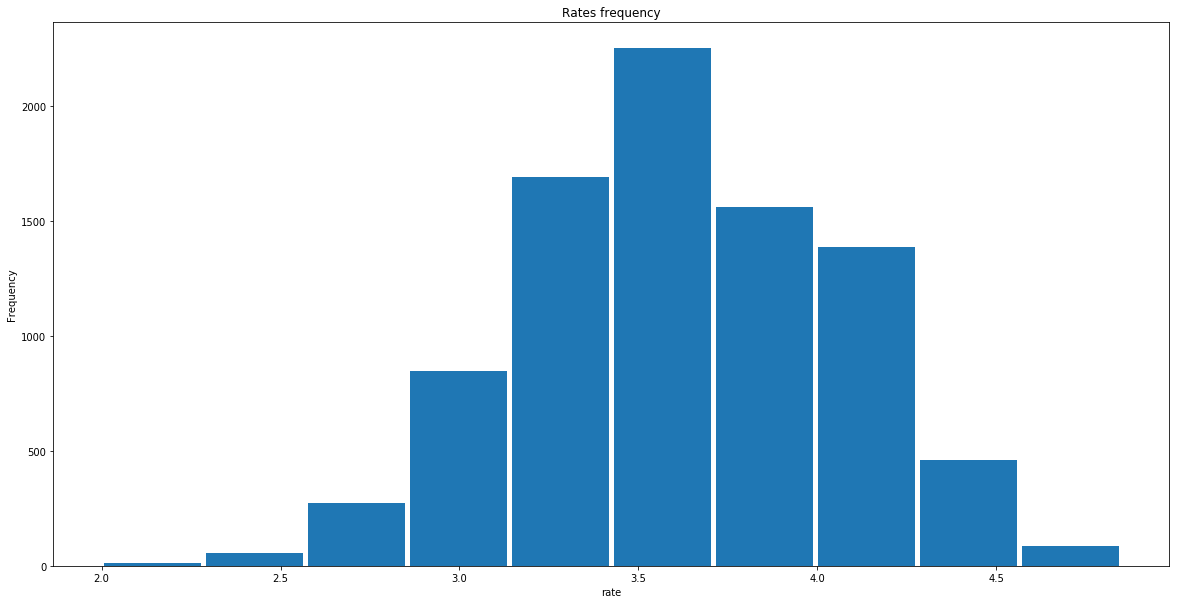

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

#plot rate frequency 
plt.xlabel('rate')
plt.ylabel('Frequency')
plt.title('Rates frequency')
plt.hist(df_rate,range=[2,4.85],rwidth=0.95)

(array([4160., 1224.,  657.,  442.,  341.,  233.,  183.,  149.,  128.,
         101.]),
 array([  1. ,  50.9, 100.8, 150.7, 200.6, 250.5, 300.4, 350.3, 400.2,
        450.1, 500. ]),
 <a list of 10 Patch objects>)

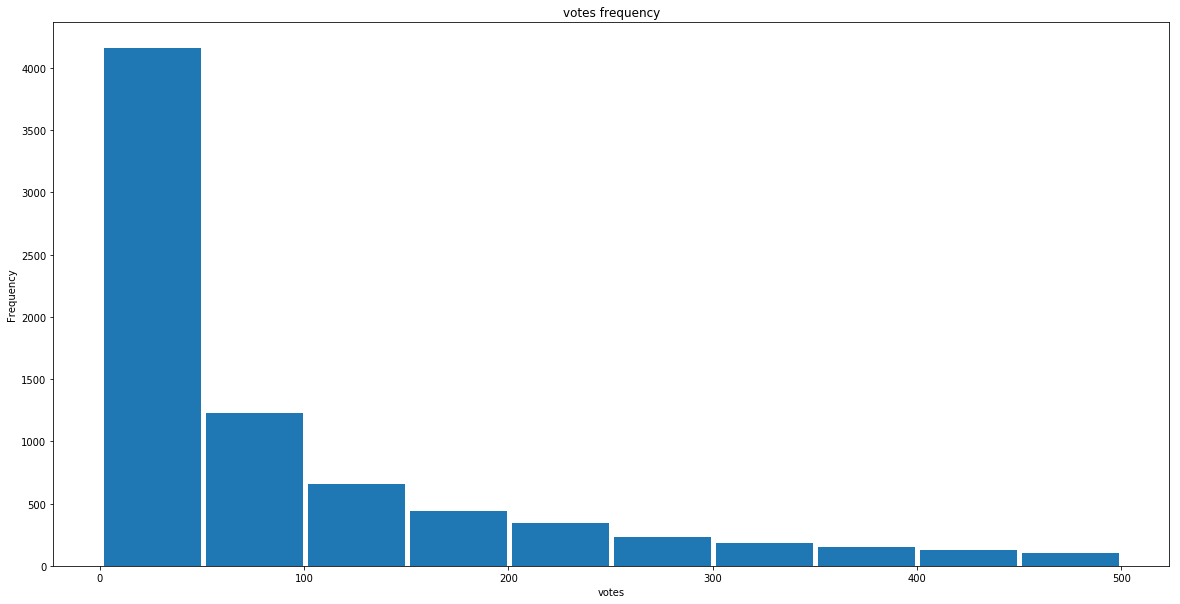

In [25]:
#plot votes frequency
df_votes=df[['votes']].dropna()
df_votes=np.array(df_votes,dtype=np.float)
plt.xlabel('votes')
plt.ylabel('Frequency')
plt.title('votes frequency')
plt.hist(df_votes,range=(1,500),rwidth=0.95)

(array([6057.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5375.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

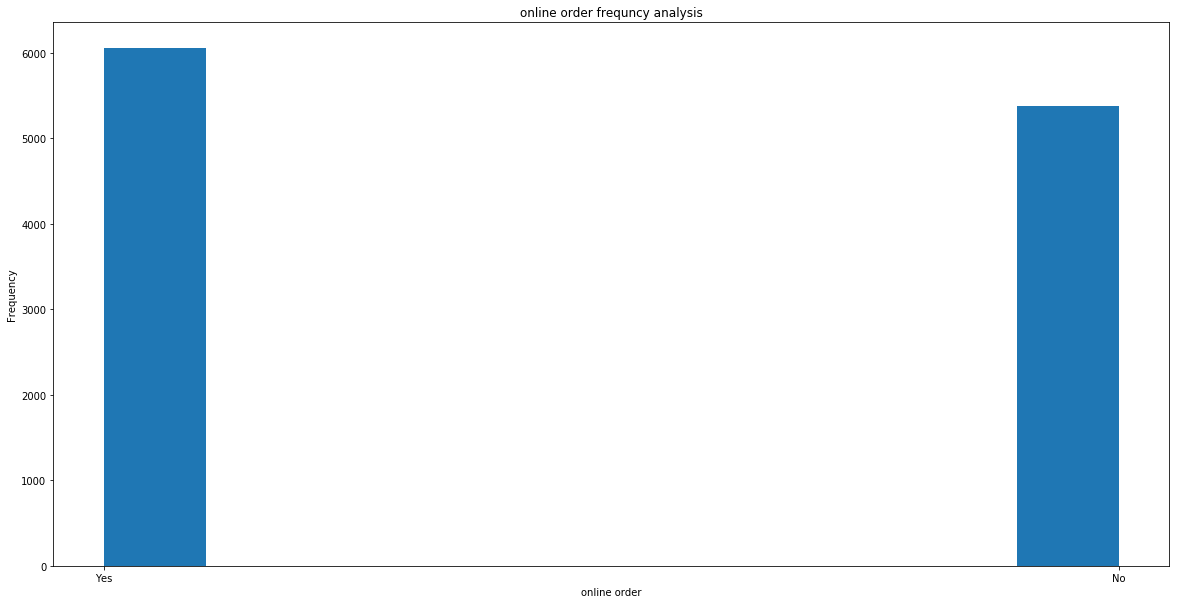

In [26]:
#plot online order frequency
df_onlineOrder=df[['online_order']]
df_onlineOrder=np.array(df_onlineOrder)
plt.xlabel('online order')
plt.ylabel('Frequency')
plt.title('online order frequncy analysis')
plt.hist(df_onlineOrder)

Text(0.5, 1.0, 'location')

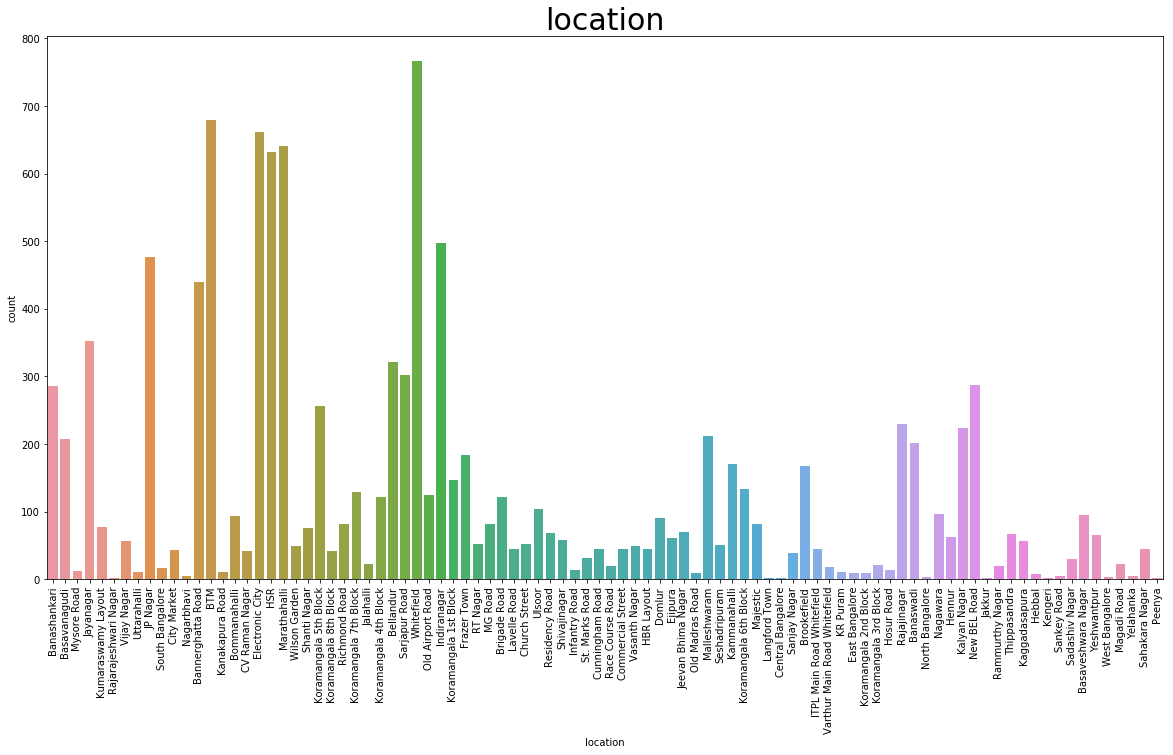

In [27]:
#plot location frequency
df_location=df[['location']]
rcParams['figure.figsize'] = 20,10
location_plot = sns.countplot(x="location",data=df_location)
location_plot.set_xticklabels(location_plot.get_xticklabels(),rotation=90)
plt.title('location',size = 30)

Text(0.5, 1.0, 'rest Type')

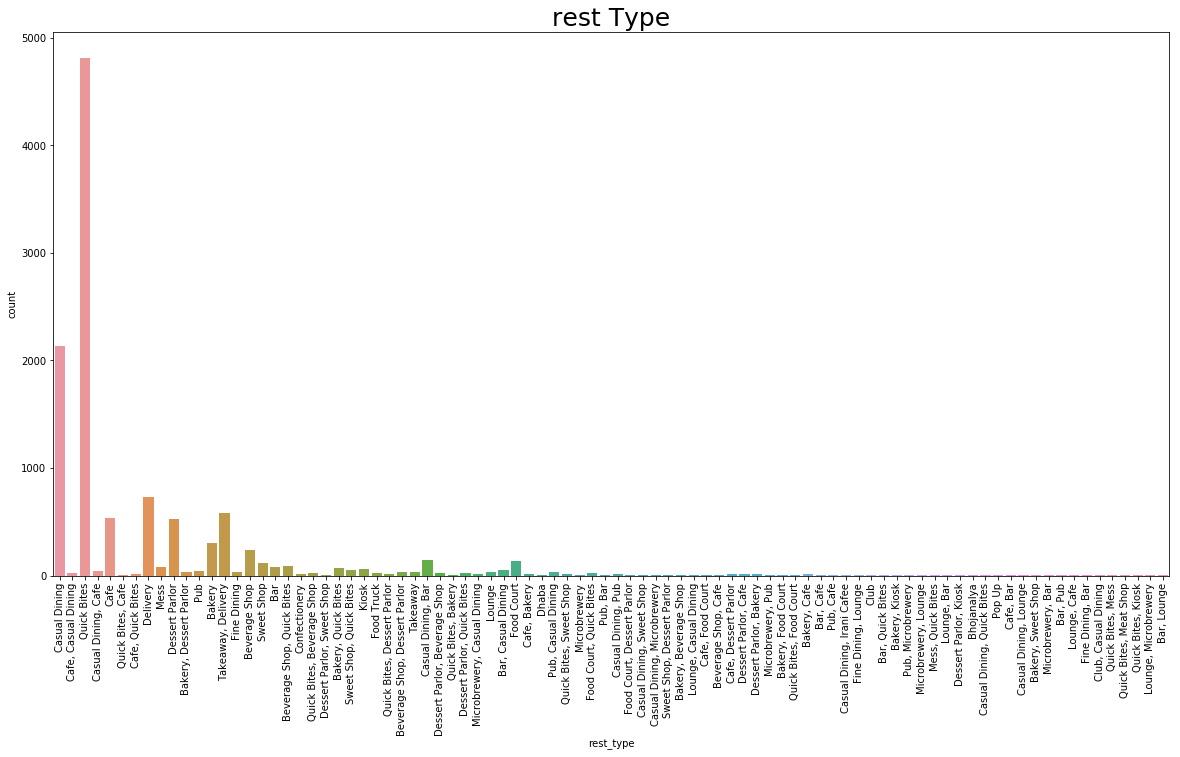

In [28]:
df_restType=df[['rest_type']]
location_plot = sns.countplot(x="rest_type",data=df_restType)
location_plot.set_xticklabels(location_plot.get_xticklabels(), rotation=90)
plt.title('rest Type',size = 25)

In [29]:
#remove useless attributes column 
df = df.drop(['url','address','book_table','phone',
              'dish_liked','listed_in(type)','name','reviews_list','menu_item','listed_in(city)'],axis=1)
df.head()

,online_order,rate,votes,location,rest_type,cuisines,approx_cost(for two people)
0,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Yes,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,Yes,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0


In [30]:
#find locations with max and min average ratings

df.rate=pd.to_numeric(df.rate)

#group by location and find mean of rate
df_new=df.groupby('location')['rate'].mean().reset_index()

#locations with max and min ratings 
df_max=df_new.loc[df_new['rate'].idxmax()]
df_min=df_new.loc[df_new['rate'].idxmin()]

print("Restaurant with max average rating")
print(df_max.head())
print("Restaurant with min average rating")
print(df_min.head())
print(df_max.location)


Restaurant with max average rating
location    St. Marks Road
rate               3.94839
Name: 80, dtype: object
Restaurant with min average rating
location    Jakkur
rate             0
Name: 30, dtype: object
St. Marks Road


In [31]:
df_location=df.loc[df['location'] == df_max.location]
df_location.head()
print(len(df_location))
df_location.head()

31


,online_order,rate,votes,location,rest_type,cuisines,approx_cost(for two people)
5011,No,3.9,89,St. Marks Road,Casual Dining,"North Indian, Mughlai, Hyderabadi",1400.0
5044,No,4.5,3568,St. Marks Road,Cafe,"Cafe, American, Burger, Steak",900.0
5085,No,3.9,74,St. Marks Road,Cafe,"Cafe, Chinese",500.0
5117,Yes,4.3,284,St. Marks Road,Quick Bites,"Burger, Turkish, Arabian, Fast Food, Salad, He...",500.0
5154,Yes,3.8,194,St. Marks Road,Casual Dining,"Biryani, Kerala, Seafood, South Indian",800.0


In [32]:
df_final=df.copy()
df_final.head()

,online_order,rate,votes,location,rest_type,cuisines,approx_cost(for two people)
0,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Yes,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,Yes,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0


In [33]:
## find unique cuisines in data
cuisines_type = list(df_final.cuisines.str.lower())
cusine_set = set(cuisines_type)
Cusine_list=list(cusine_set)
print(len(Cusine_list))

# find unique rest_type in data
rest_type = list(df_final.rest_type.str.lower())
rest_set = set(rest_type)
rest_list=list(rest_set)
print(len(rest_list))

#find unique location 
location_type = list(df_final.location.str.lower())
location_set = set(location_type)
location_list=list(location_set)
print(len(location_list))

2481
88
92


In [34]:
#encoding category deatils in to numaric 
from sklearn.preprocessing import LabelEncoder
lbl_location=LabelEncoder()
lbl_restType=LabelEncoder()
lbl_cuisine=LabelEncoder()

lbl_location.fit(location_list)
lbl_restType.fit(rest_list)
lbl_cuisine.fit(Cusine_list)

test1=lbl_location.transform(df_final.location.str.lower())
test2=lbl_restType.transform(df_final.rest_type.str.lower())
test3=lbl_cuisine.transform(df_final.cuisines.str.lower())


In [35]:
#make new dataframe for model 
new_data={}
new_data["rate"]=df["rate"]
new_data["location"]=lbl_location.transform(df_final.location.str.lower())
new_data["cuisines"]=lbl_cuisine.transform(df_final.cuisines.str.lower())
new_data["rest_type"]=lbl_restType.transform(df_final.rest_type.str.lower())
new_data["price"]=df["approx_cost(for two people)"]
new_data = pd.DataFrame(new_data)
new_data.head()

,rate,location,cuisines,rest_type,price
0,4.1,0,1960,26,800.0
1,4.1,0,878,26,800.0
2,3.8,0,704,22,800.0
3,3.7,0,2333,73,300.0
4,3.8,3,1986,26,600.0


In [36]:
# make model
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt

X = new_data.iloc[:,0:4]
Y = new_data.iloc[:,4]

# split data into train and test sets
seed = 7
test_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

rng = np.random.RandomState(5)
model_randomForest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto',min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None)

model_randomForest.fit(X_train, Y_train)

#predict testing data 
y_predict=model_randomForest.predict(X_test)

#predict traing data
y_predict_train=model_randomForest.predict(X_train)


print("RMSE-testing",sqrt(mean_squared_error(Y_test, y_predict)))
print("RMSE-training",sqrt(mean_squared_error(Y_train, y_predict_train)))
print("testing dataset r2_score",r2_score(Y_test,y_predict))
print("training dataset r2_score",r2_score(Y_train,y_predict_train))

RMSE-testing 176.06490294407868
RMSE-training 125.08654072872967
testing dataset r2_score 0.688338084266918
training dataset r2_score 0.8691587025391908


In [37]:
#K-fold cross validation 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
cross_score = cross_val_score(model_randomForest, X_test, Y_test, cv=15)
print('Average K-Fold Score :' , np.mean(cross_score))

# Make cross validated predictions
predictions = cross_val_predict(model_randomForest, X_test, Y_test, cv=15)

#accuracy of k-fold cross validation 
accuracy = metrics.r2_score(Y_test, predictions)
print("accuracy r2_score",accuracy)


Average K-Fold Score : 0.6119685206154664
accuracy r2_score 0.615171013683474


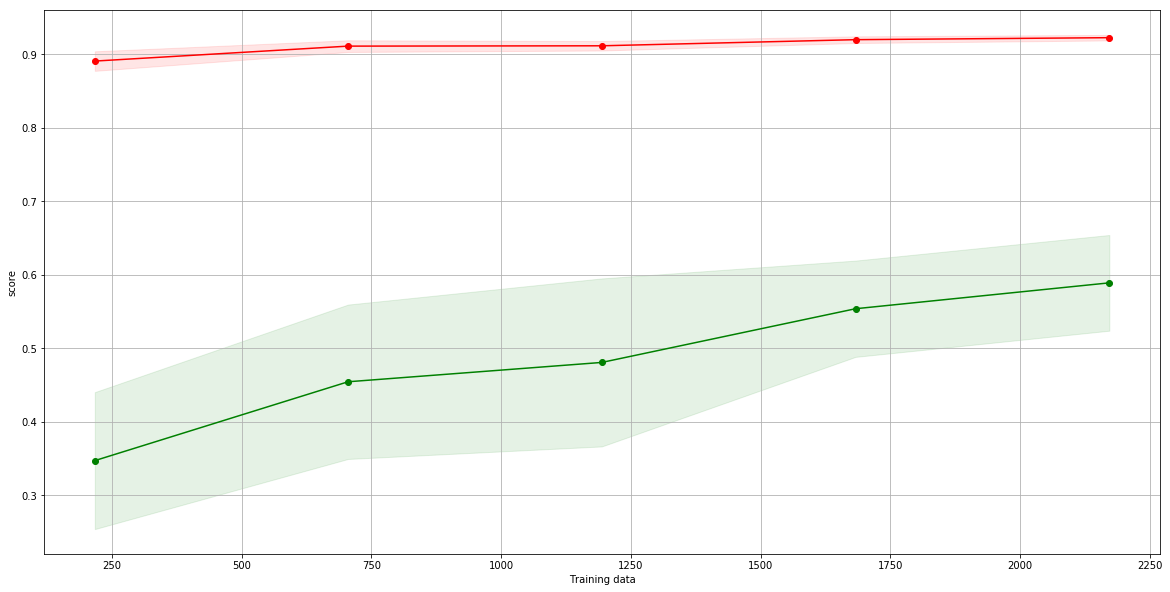

In [38]:
from sklearn.model_selection import learning_curve
plt.xlabel("Training data")
plt.ylabel("score")
trainSize, trainScores, testScores = learning_curve(
        RandomForestRegressor(), X_test, Y_test, cv=20, n_jobs=2)

testScores_std = np.std(testScores, axis=1)
trainScores_std = np.std(trainScores, axis=1)
testScores_mean = np.mean(testScores, axis=1)
trainScores_mean = np.mean(trainScores, axis=1)

plt.grid()

plt.fill_between(trainSize, trainScores_mean - trainScores_std,
                     trainScores_mean + trainScores_std, alpha=0.1,
                     color="r")
plt.fill_between(trainSize, testScores_mean - testScores_std,
                     testScores_mean + testScores_std, alpha=0.1, color="g")

plt.plot(trainSize, testScores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.plot(trainSize, trainScores_mean, 'o-', color="r",
             label="Training score")




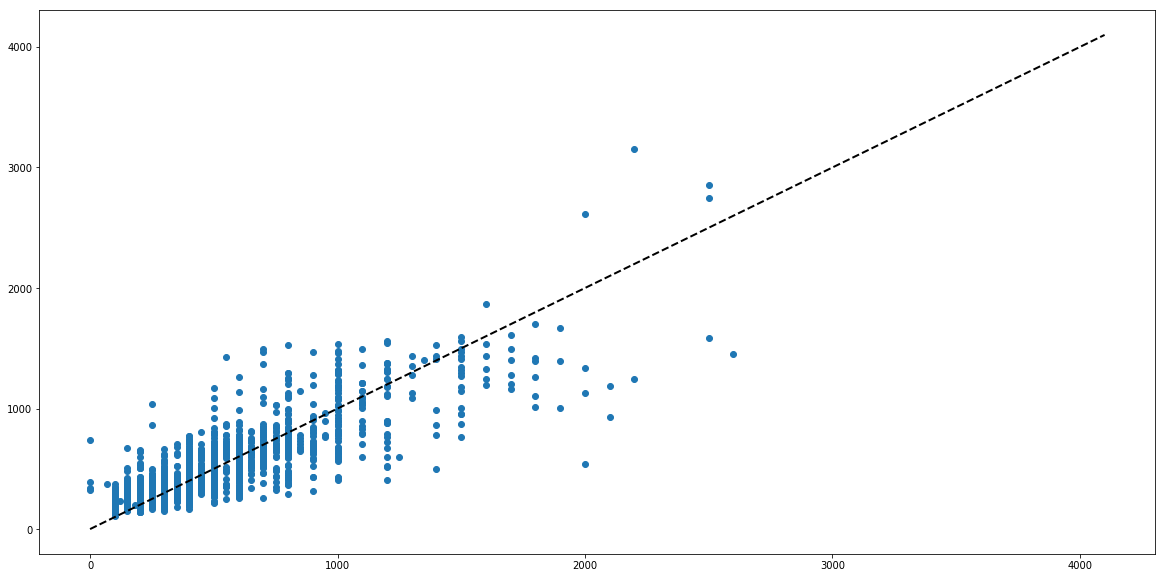

In [39]:
# plot graph with testing data 
fig,ax=plt.subplots()
ax.scatter(Y_test, y_predict)
ax.plot([Y.min(),Y.max()],[Y.min(),Y.max()],'k--',lw=2)
plt.show()

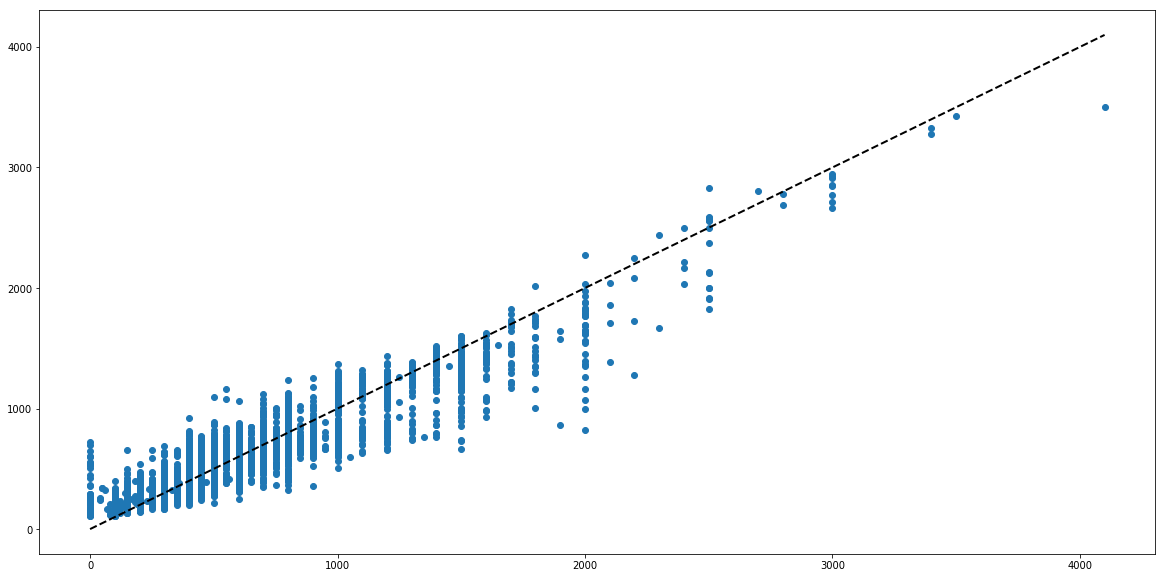

In [40]:
# plot graph with training data 
fig,ax=plt.subplots()
ax.scatter(Y_train, y_predict_train)
ax.plot([Y.min(),Y.max()],[Y.min(),Y.max()],'k--',lw=2)
plt.show()

In [41]:
#start working on Tuning model by spliting attributes 

#Identify maximum no of cuisine in one row 
df_final.location=df_final['location'].str.replace(',','')
cuisines_type = list(df_final['cuisines'])
max_val=1
for i in cuisines_type:
    temp = str(i)
    if len(temp.split(',')) > max_val:
         max_val = len(temp.split(','))



# find unique cuisines in data
cuisine_list_temp=[]

for i in cuisines_type:
    k = str(i)
    temp=k.split(',')
    for j in temp:
        cuisine_list_temp.append(j.lower())

cusine_set = set(cuisine_list_temp)
Cusine_list=list(cusine_set)
print("Number of Unique Cuisines:"+ str(len(Cusine_list)))
    
# list of cusine split different cuisine in 7 column of cusine 

CL1=[]
CL2=[]
CL3=[]
CL4=[]
CL5=[]
CL6=[]
CL7=[]
CL8=[]

dict=[]
dict.append(CL1)
dict.append(CL2)
dict.append(CL3)
dict.append(CL4)
dict.append(CL5)
dict.append(CL6)
dict.append(CL7)
dict.append(CL8)

for i in cuisines_type:
    k = str(i)
    temp=k.split(',')
    for j in range(0,len(dict)):
        if j <len(temp):
            dict[j].append(temp[j].lower())
        else:
            dict[j].append("none")


            
Cusine_list.append("none")

print(Cusine_list)

Number of Unique Cuisines:187
['seafood', 'russian', ' middle eastern', 'biryani', ' finger food', 'japanese', 'north eastern', 'tibetan', ' ice cream', 'hyderabadi', ' north eastern', 'desserts', ' bengali', 'lucknowi', 'salad', 'juices', ' steak', ' pizza', 'vietnamese', ' mediterranean', ' oriya', 'north indian', 'pizza', 'sushi', 'singaporean', 'awadhi', ' cantonese', ' maharashtrian', 'kashmiri', ' belgian', ' assamese', 'rajasthani', ' naga', ' chettinad', ' north indian', ' rajasthani', ' sandwich', ' mughlai', ' japanese', 'mexican', ' lebanese', 'nepalese', 'australian', ' mongolian', 'ice cream', 'middle eastern', ' sushi', 'bakery', ' american', ' bbq', ' burmese', ' grill', ' iranian', ' french', ' gujarati', ' south american', 'roast chicken', 'french', ' korean', ' south indian', 'mangalorean', 'american', ' arabian', ' thai', ' asian', ' sri lankan', ' coffee', 'kerala', ' greek', 'gujarati', 'rolls', ' singaporean', ' afghan', ' hot dogs', 'drinks only', 'european', ' k

In [42]:
# list of Rest_types split in 2 columns 
rest_type = list(df_final['rest_type'])

max_val=1
for i in rest_type:
    temp = str(i)
    if len(temp.split(',')) > max_val:
         max_val = len(temp.split(','))


# find unique Rest_type in data
Rest_list_temp=[]

for i in rest_type:
    k = str(i)
    temp=k.split(',')
    for j in temp:
        Rest_list_temp.append(j.lower())

restType_set = set(Rest_list_temp)
restType_list=list(restType_set)

# list of cusine split different cuisine in 7 column of cusine 

RTL1=[]
RTL2=[]
RTL=[]
RTL.append(RTL1)
RTL.append(RTL2)

for i in rest_type:
    k = str(i)
    temp=k.split(',')
    for j in range(0,len(RTL)):
        if j <len(temp):
            RTL[j].append(temp[j].lower())
        else:
            RTL[j].append("none")

restType_list.append("none")
print("Unique Restaurant Types:"+str(len(restType_list)))
print(restType_list)



Unique Restaurant Types:41
[' cafe', 'pub', ' lounge', 'bhojanalya', 'food court', 'lounge', 'mess', 'quick bites', 'dessert parlor', 'casual dining', 'dhaba', ' dessert parlor', ' quick bites', 'food truck', 'beverage shop', ' microbrewery', 'pop up', ' bakery', ' delivery', ' sweet shop', ' food court', 'bar', ' kiosk', ' bar', 'club', 'sweet shop', 'confectionery', 'delivery', 'takeaway', 'kiosk', ' casual dining', 'cafe', ' beverage shop', 'microbrewery', ' irani cafee', 'bakery', 'fine dining', ' pub', ' meat shop', ' mess', 'none']


In [43]:
#make list of unique location
location=list(df_final["location"])
location_list_temp=[]

for i in location:
    k = str(i)
    temp=k.split(',')
    for j in temp:
        location_list_temp.append(j.strip().lower())

location_list_set=set(location_list_temp)
location_list=list(location_list_set)
print("Total Unique Locations:",len(location_list))
print(location_list)


Total Unique Locations: 92
['whitefield', 'seshadripuram', 'central bangalore', 'varthur main road whitefield', 'electronic city', 'jp nagar', 'koramangala 5th block', 'cv raman nagar', 'sarjapur road', 'st. marks road', 'west bangalore', 'koramangala 6th block', 'vijay nagar', 'hbr layout', 'kalyan nagar', 'kr puram', 'nagarbhavi', 'rt nagar', 'east bangalore', 'rajarajeshwari nagar', 'hennur', 'koramangala 2nd block', 'malleshwaram', 'south bangalore', 'commercial street', 'shanti nagar', 'peenya', 'koramangala 8th block', 'magadi road', 'sanjay nagar', 'richmond road', 'koramangala 4th block', 'domlur', 'thippasandra', 'langford town', 'itpl main road whitefield', 'basavanagudi', 'indiranagar', 'kaggadasapura', 'sahakara nagar', 'basaveshwara nagar', 'koramangala 7th block', 'uttarahalli', 'bommanahalli', 'banashankari', 'kumaraswamy layout', 'kengeri', 'old madras road', 'koramangala 1st block', 'yeshwantpur', 'rajajinagar', 'mysore road', 'bannerghatta road', 'old airport road', '

In [44]:
#encoding category deatils in to numaric 
from sklearn.preprocessing import LabelEncoder
lbl_location1=LabelEncoder()
lbl_restType1=LabelEncoder()
lbl_cuisine1=LabelEncoder()

lbl_location1.fit(location_list)
lbl_restType1.fit(restType_list)
lbl_cuisine1.fit(Cusine_list)

test1=lbl_location1.transform(df_final["location"].str.lower())
test2=lbl_cuisine1.transform(CL1)
test3=lbl_restType1.transform(RTL1)
print(test3)


[22 22 21 ... 22 38 22]


In [45]:
#make new data set by adding new column for cuisines and rest_type
df_tune=df_final.copy()
df_tune["cuisine1"]=CL1
df_tune["cuisine2"]=CL2
df_tune["cuisine3"]=CL3
df_tune["cuisine4"]=CL4
df_tune["cuisine5"]=CL5
df_tune["cuisine6"]=CL6
df_tune["cuisine7"]=CL7
df_tune["cuisine8"]=CL8
df_tune["rest_type1"]=RTL1
df_tune["rest_type2"]=RTL2
df_tune["location"]=df_tune["location"].str.lower()
df_tune = df_tune.drop(['cuisines','rest_type'],axis=1)
df_tune.head()



,online_order,rate,votes,location,approx_cost(for two people),cuisine1,cuisine2,cuisine3,cuisine4,cuisine5,cuisine6,cuisine7,cuisine8,rest_type1,rest_type2
0,Yes,4.1,775,banashankari,800.0,north indian,mughlai,chinese,none,none,none,none,none,casual dining,none
1,Yes,4.1,787,banashankari,800.0,chinese,north indian,thai,none,none,none,none,none,casual dining,none
2,Yes,3.8,918,banashankari,800.0,cafe,mexican,italian,none,none,none,none,none,cafe,casual dining
3,No,3.7,88,banashankari,300.0,south indian,north indian,none,none,none,none,none,none,quick bites,none
4,No,3.8,166,basavanagudi,600.0,north indian,rajasthani,none,none,none,none,none,none,casual dining,none


In [46]:
#make new dataframe for model 
new_data={}
new_data["rate"]=df_tune["rate"]
new_data["location"]=lbl_location1.transform(df_final["location"].str.lower())
new_data["cuisine1"]=lbl_cuisine1.transform(df_tune["cuisine1"])
new_data["cuisine2"]=lbl_cuisine1.transform(df_tune["cuisine2"])
new_data["cuisine3"]=lbl_cuisine1.transform(df_tune["cuisine3"])
new_data["cuisine4"]=lbl_cuisine1.transform(df_tune["cuisine4"])
new_data["cuisine5"]=lbl_cuisine1.transform(df_tune["cuisine5"])
new_data["cuisine6"]=lbl_cuisine1.transform(df_tune["cuisine6"])
new_data["cuisine7"]=lbl_cuisine1.transform(df_tune["cuisine7"])
new_data["cuisine8"]=lbl_cuisine1.transform(df_tune["cuisine8"])
new_data["rest_type1"]=lbl_restType1.transform(df_tune["rest_type1"])
new_data["rest_type2"]=lbl_restType1.transform(df_tune["rest_type2"])
new_data["price"]=df_tune["approx_cost(for two people)"]
new_data = pd.DataFrame(new_data)
new_data.head()

,rate,location,cuisine1,cuisine2,cuisine3,cuisine4,cuisine5,cuisine6,cuisine7,cuisine8,rest_type1,rest_type2,price
0,4.1,0,164,67,24,162,162,162,162,162,22,35,800.0
1,4.1,0,124,71,95,162,162,162,162,162,22,35,800.0
2,3.8,0,121,61,45,162,162,162,162,162,21,4,800.0
3,3.7,0,178,71,162,162,162,162,162,162,38,35,300.0
4,3.8,3,164,77,162,162,162,162,162,162,22,35,600.0


In [47]:
X = new_data.iloc[:,0:12]
Y = new_data.iloc[:,12]

# split data into train and test sets
seed = 7
test_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

rng = np.random.RandomState(5)
model_randomForest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto',min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None)



model_randomForest.fit(X_train, Y_train)

#predict testing data 
y_predict=model_randomForest.predict(X_test)

#predict traing data
y_predict_train=model_randomForest.predict(X_train)

print("RMSE-testing",sqrt(mean_squared_error(Y_test, y_predict)))
print("RMSE-training",sqrt(mean_squared_error(Y_train,y_predict_train)))
print("testing dataset r2_score",r2_score(Y_test,y_predict))
print("training dataset r2_score",r2_score(Y_train,y_predict_train))

RMSE-testing 174.84411021477752
RMSE-training 124.98779200378007
testing dataset r2_score 0.6926450816704779
training dataset r2_score 0.8693652045537806


In [48]:
#tuning model using GridSearchcv
from sklearn.model_selection import GridSearchCV

# Maximum number of levels in tree
max_depth = [11,12,13,14,15,16,17,18,19,20]

# min sample split
min_samples_split = [2,3,4,5,6,7]
# Method of selecting samples for training each tree

#bootstrap
bootstrap = [True, False]

# Create the param_grid
param_grid = {
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap
               }


grid_searchCV = GridSearchCV(estimator=model_randomForest, param_grid=param_grid, cv= 5)
grid_searchCV.fit(X_test, Y_test)
print("best parameteres",grid_searchCV.best_params_)

y_predict=grid_searchCV.predict(X_test)
print("testing dataset r2_score",r2_score(Y_test,y_predict))
print("RMSE",sqrt(mean_squared_error(Y_test,y_predict)))

/Users/bhumipatel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameteres {'bootstrap': True, 'max_depth': 11, 'min_samples_split': 3}
testing dataset r2_score 0.8514030668319893
RMSE 121.57263976771628
